In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
#join additional weather and holiday data to the trips data
trips = pd.read_csv('../data/modelInput/flowPerHourAndStation.csv')
trips['date_hour'] = trips['date_hour'].apply(pd.Timestamp)
trips = trips[['date_hour', 'departures']].groupby(['date_hour']).sum()
trips = trips.reset_index()
additional_features = pd.read_csv('../data/modelInput/additionalFeatures.csv')
additional_features['date_hour'] = additional_features['date_hour'].apply(pd.Timestamp)
augmented_trips = trips.merge(additional_features, how='left', on=('date_hour'))

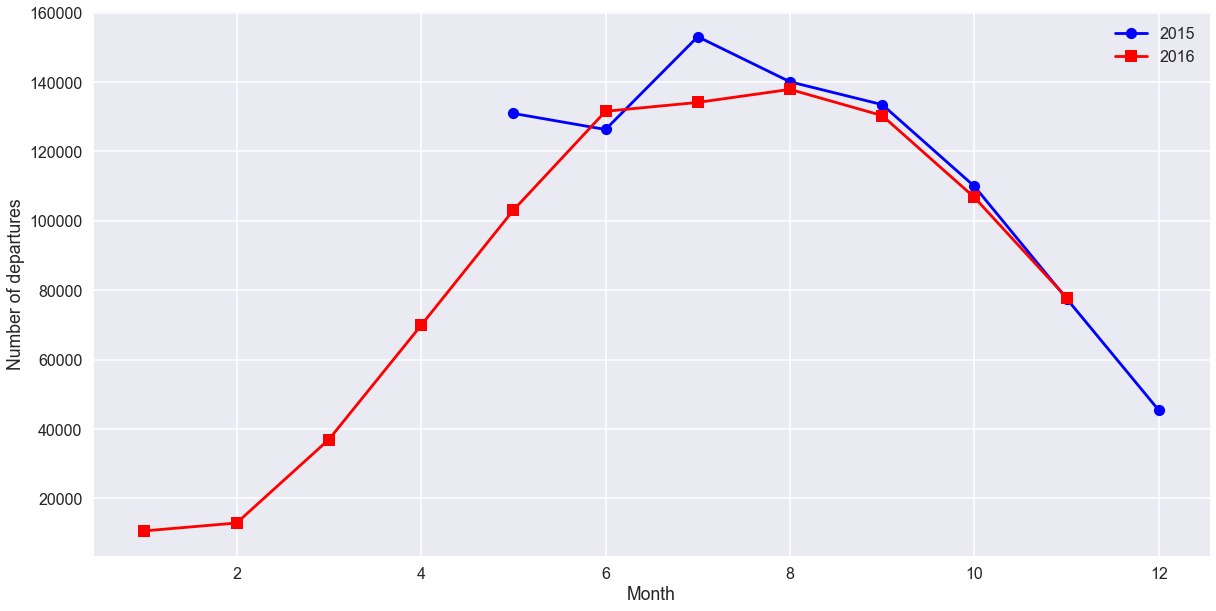

In [3]:
trips_per_month = augmented_trips[['month', 'year', 'departures']]
trips_per_month = trips_per_month.groupby(['month', 'year']).sum()

plt.xlabel('Month')
plt.ylabel('Number of departures')
plt.plot(trips_per_month.xs(2015, level='year'), 'bo-', label='2015')
plt.plot(trips_per_month.xs(2016, level='year'), 'rs-', label='2016')
plt.legend()
plt.show()

In [4]:
#We have data from 2 summer periods, but only one winter period. Avoid bias by taking a window of a full year.
augmented_trips = augmented_trips.set_index('date_hour')
full_year_trips = augmented_trips[pd.Timestamp(2015, 5, 1):pd.Timestamp(2016, 5, 1)]
full_year_trips = full_year_trips.reset_index()

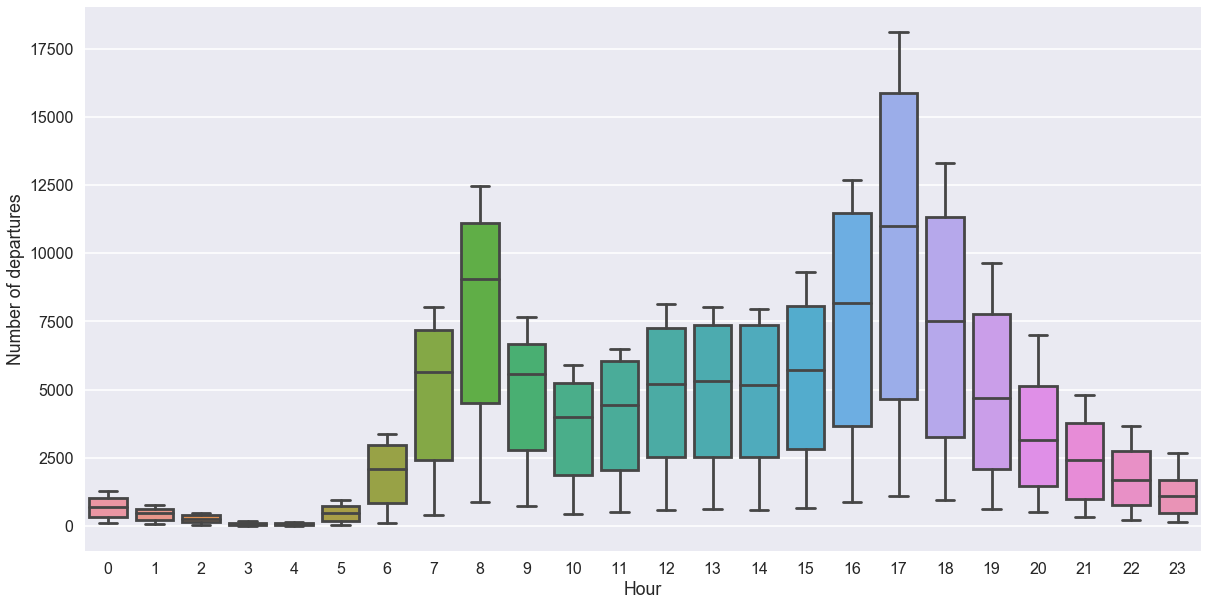

In [5]:
trips_per_hour = full_year_trips[['hour', 'month', 'departures']].groupby(['hour', 'month']).sum()
trips_per_hour = trips_per_hour.reset_index()
ax = sns.boxplot(x="hour", y="departures", data=trips_per_hour, whis=np.inf)
ax.set(xlabel='Hour', ylabel='Number of departures')

In [6]:
full_year_trips[['log_departures']] = full_year_trips[['departures']] + 1 
full_year_trips[['log_departures']] = full_year_trips[['log_departures']].apply(np.log10) 

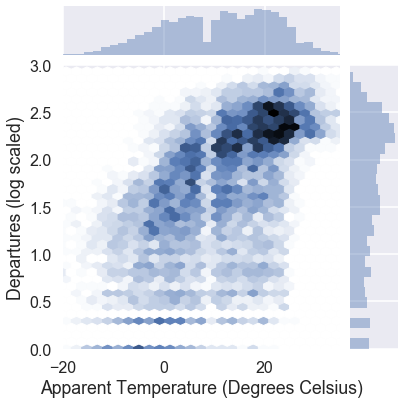

In [7]:
ax = sns.jointplot(x="apparentTemperature", y="log_departures", data=full_year_trips, kind="hex", xlim=[-20, 35], ylim=[0, 3], stat_func=None)
ax.set_axis_labels("Apparent Temperature (Degrees Celsius)", "Departures (log scaled)")

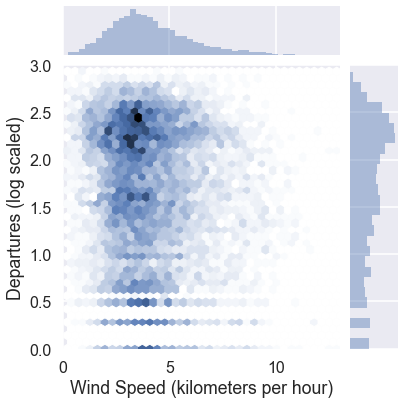

In [8]:
ax = sns.jointplot(x="windSpeed", y="log_departures", data=full_year_trips, kind="hex", xlim=[0, 13], ylim=[0, 3], stat_func=None)
ax.set_axis_labels("Wind Speed (kilometers per hour)", "Departures (log scaled)")